#Data engenieering

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
import re


In [ ]:
import pandas as pd
from ast import literal_eval

def load_and_concat_dataframes():

    file_paths = [
        '/content/drive/MyDrive/idealista project/df_houses_03001_1.csv',
        '/content/drive/MyDrive/idealista project/df_houses_03002_2.csv',
        '/content/drive/MyDrive/idealista project/df_houses_03003.csv',
        '/content/drive/MyDrive/idealista project/df_houses_03004.csv',
        '/content/drive/MyDrive/idealista project/df_houses_03005_2.csv',
        '/content/drive/MyDrive/idealista project/df_houses_06_01.csv',
        '/content/drive/MyDrive/idealista project/df_houses_07.csv'
    ]
    dfs = []
    # Iterate over the file paths and load the dataframes
    for i, file_path in enumerate(file_paths):
      postal_code = f'0300{i+1}'  # Increment i by 1
      df_1 = pd.read_csv(file_path, converters={'basic_features': literal_eval, 'extra_features': literal_eval})

    # Create a new column for postal code
      df_1['postal_code'] = postal_code
     
      dfs.append(df_1)
      concatenated_df = pd.concat(dfs, ignore_index=True)
      
    return concatenated_df


df = load_and_concat_dataframes()


print(df.head())


                                    title            location  precio  \
0            Piso en venta en calle Colón  Centro Tradicional  328000   
1            Piso en venta en calle Colón  Centro Tradicional  328000   
2     Piso en venta en calle Ángel Lozano  Centro Tradicional  320000   
3  Piso en venta en calle de Ángel Lozano  Centro Tradicional  280000   
4       Piso en venta en calle del Teatro  Centro Tradicional  275000   

                                      basic_features  \
0  [198 m² construidos, 177 m² útiles, 4 habitaci...   
1  [198 m² construidos, 177 m² útiles, 4 habitaci...   
2  [172 m² construidos, 162 m² útiles, 5 habitaci...   
3  [172 m² construidos, 162 m² útiles, 5 habitaci...   
4  [122 m² construidos, 109 m² útiles, 4 habitaci...   

                                      extra_features postal_code  
0  [Aire acondicionado, Consumo: \n130 kWh/m² año...       03001  
1  [Aire acondicionado, Consumo: \n130 kWh/m² año...       03001  
2  [Consumo: \n103 kWh/

In [ ]:
df

,title,location,precio,basic_features,extra_features,postal_code
0,Piso en venta en calle Colón,Centro Tradicional,328000,"[198 m² construidos, 177 m² útiles, 4 habitaci...","[Aire acondicionado, Consumo: \n130 kWh/m² año...",03001
1,Piso en venta en calle Colón,Centro Tradicional,328000,"[198 m² construidos, 177 m² útiles, 4 habitaci...","[Aire acondicionado, Consumo: \n130 kWh/m² año...",03001
2,Piso en venta en calle Ángel Lozano,Centro Tradicional,320000,"[172 m² construidos, 162 m² útiles, 5 habitaci...","[Consumo: \n103 kWh/m² año, Emisiones: \n21 kg...",03001
3,Piso en venta en calle de Ángel Lozano,Centro Tradicional,280000,"[172 m² construidos, 162 m² útiles, 5 habitaci...",[En trámite],03001
4,Piso en venta en calle del Teatro,Centro Tradicional,275000,"[122 m² construidos, 109 m² útiles, 4 habitaci...",[En trámite],03001
...,...,...,...,...,...,...
2185,Piso en venta en Benalúa,Benalúa-La Florida-Babel-San Gabriel,126000,"[85 m² construidos, 80 m² útiles, 2 habitacion...",[No indicado],03007
2186,Piso en venta en Benalúa,Benalúa-La Florida-Babel-San Gabriel,93000,"[75 m² construidos, 70 m² útiles, 3 habitacion...",[En trámite],03007
2187,Casa o chalet en venta en La Florida,Benalúa-La Florida-Babel-San Gabriel,135000,"[Casa o chalet, 156 m² construidos, 3 habitaci...",[En trámite],03007
2188,Piso en venta en calle Astrónomo Comas Sola,La Florida,149000,"[85 m² construidos, 2 habitaciones, 2 baños, T...","[Aire acondicionado, Consumo:, Emisiones:]",03007


In [ ]:
df.basic_features[2025]

['118 m² construidos',
 '3 habitaciones',
 '2 baños',
 'Terraza',
 'Plaza de garaje incluida en el precio',
 'Promoción de obra nueva',
 'Armarios empotrados',
 'Trastero',
 'Planta 3ª exterior',
 'Con ascensor']

In [ ]:
df.extra_features[35]

['Aire acondicionado', 'En trámite']

In [ ]:
def match_property(property, patterns):
  for pat in patterns:
    match_prop = re.search(pat, property)
    if match_prop:
      return True
  return False

In [ ]:
match_property('con trasteros', ['con'])

True

In [ ]:
def check_property(property, patterns):
  for pat in patterns:
    check = re.search(pat, property)
    if check:
      return 1
  return 0

In [ ]:
check_property('con trasteros', ['con'])

1

In [ ]:
def get_number(property):
  nums = re.findall(r'\d+', property)
  if len(nums) ==2:
         return int(nums[0] + nums[1])
  else:
    return int(nums[0])

In [ ]:
def get_number_1(property):
    nums = re.findall(r'\d+', property)
    if len(nums) >= 2:
        return int(nums[0]) + int(nums[1])
    elif len(nums) == 1:
        return int(nums[0])
    else:
        return None  # or raise an appropriate error

In [ ]:
re.findall(r'\d+', '2 baños')

['2']

In [ ]:
get_number('2 baños')

2

In [ ]:
def get_elevator(features):
  for prop in features:
    #find if there is there is elevator
    if match_property(prop.lower().strip(), ['ascensor']):
      #1 if it exists 0 if not
      return(check_property(prop.lower().strip(), ['con']))

In [ ]:
match_property('con ascensor'.lower().strip(), ['ascensor'])

True

In [ ]:
check_property('con ascensor'.lower().strip(), ['con'])

1

In [ ]:
get_elevator(['con ascensor'])

1

In [ ]:
def get_toilets(features):
  for prop in features:
    if match_property(prop.lower().strip(), ['baño']):
      return(get_number_1(prop.lower().strip()))



In [ ]:
get_toilets(['3 baños'])

3

In [ ]:
def get_year(features):
  for prop in features:
    if match_property(prop.lower().strip(), ['construido en ']):
      return(get_number(prop.lower().strip()))

In [ ]:
get_year(['construido en 1999'])

1999

In [ ]:
def get_storage_room(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['trastero']):
      value += 1
  return value

In [ ]:
def get_orientation(features):
    for prop in features:
      if match_property(prop.lower().strip(), ['orientación']):
        return(prop.split(' ', maxsplit = 1)[1].strip().split(', ')[0])
  

In [ ]:
'orientacion sur, este'.split(' ', maxsplit=1)[1].strip().split(', ')[0]

'sur'

In [ ]:
def get_piso(features):
  for prop in features:
     if match_property(prop.lower().strip(), ['bajo', 'planta', 'interior', 'exterior']):
      return(prop)

In [ ]:
df.basic_features[150]

['98 m² construidos, 92 m² útiles',
 '3 habitaciones',
 '2 baños',
 'Terraza',
 'Plaza de garaje incluida en el precio',
 'Segunda mano/buen estado',
 'Armarios empotrados',
 'Orientación este, oeste',
 'Construido en 1991',
 'Calefacción individual: Eléctrica',
 'Solo acceso exterior adaptado para personas con movilidad reducida',
 'Planta 3ª exterior',
 'Con ascensor']

In [ ]:
def get_rooms(features):
  for prop in features:
     if match_property(prop.lower().strip(), ['habitaci']):
      try: 
        rooms = get_number(prop.lower().strip())
      except:
        rooms = prop
      return(rooms)



In [ ]:
def get_metros(features):
  for prop in features:
     if match_property(prop.lower().strip(), ['m²']):
      try: 
        metros = get_number(prop.lower().strip().split(',')[0])
      except:
        metros = prop

      return(metros)


In [ ]:
def get_consumption(features):
    for prop in features:
        if match_property(prop.lower().strip(), ['consumo']):
            try:
                consumption_str = prop.lower().strip().split(':')[1]  # Extract the string after ':' delimiter
                consumption = get_number(consumption_str)
                return consumption
            except:
                consumption = prop

    return None

In [ ]:
def get_condition(features):
  for prop in features:
     if match_property(prop.lower().strip(), ['segunda mano', 'promocion de obra nueva']):
      return(prop)

In [ ]:
def get_wardrobe(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['armarios empotrados']):
      value += 1
  return value

In [ ]:
def get_terrace(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['terraza']):
      value += 1
  return value

In [ ]:
def get_balcony(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['balcón']):
      value += 1
  return value

In [ ]:
def get_garden(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['jardín']):
      value += 1
  return value

In [ ]:
def get_garage(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['garaje']):
      value += 1
  return value

In [ ]:
def get_heating(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['calefacción']):
      value += 1
  return value

In [ ]:
def get_air_conditioning(features):
  value = 0 
  for prop in features:
    if match_property(prop.lower().strip(), ['aire acondicionado']):
      value += 1
  return value

In [ ]:
df['elevator'] = df.basic_features.apply(get_elevator)
df['toilets'] = df.basic_features.apply(get_toilets)
df['year'] = df.basic_features.apply(get_year)
df['storage_room'] = df.basic_features.apply(get_storage_room)
df['orientation'] = df.basic_features.apply(get_orientation)
df['flat'] = df.basic_features.apply(get_piso)
df['rooms'] = df.basic_features.apply(get_rooms)
df['metros'] = df.basic_features.apply(get_metros)
df['codition'] = df.basic_features.apply(get_condition)
df['wardrobe'] = df.basic_features.apply(get_wardrobe)

df['terrace'] = df.basic_features.apply(get_terrace)
df['balcony'] = df.basic_features.apply(get_balcony)
df['garden'] = df.basic_features.apply(get_garden)
df['garage'] = df.basic_features.apply(get_garage)
df['heating'] = df.basic_features.apply(get_heating)
df['air_conditioning'] = df.extra_features.apply(get_air_conditioning)










In [ ]:
df

,title,location,precio,basic_features,extra_features,postal_code,elevator,toilets,year,storage_room,...,rooms,metros,codition,wardrobe,terrace,balcony,garden,garage,heating,air_conditioning
0,Piso en venta en calle Colón,Centro Tradicional,328000,"[198 m² construidos, 177 m² útiles, 4 habitaci...","[Aire acondicionado, Consumo: \n130 kWh/m² año...",03001,1.0,2.0,NaN,1,...,4,198,Segunda mano/buen estado,1,1,1,0,0,1,1
1,Piso en venta en calle Colón,Centro Tradicional,328000,"[198 m² construidos, 177 m² útiles, 4 habitaci...","[Aire acondicionado, Consumo: \n130 kWh/m² año...",03001,1.0,2.0,NaN,1,...,4,198,Segunda mano/buen estado,1,1,1,0,0,1,1
2,Piso en venta en calle Ángel Lozano,Centro Tradicional,320000,"[172 m² construidos, 162 m² útiles, 5 habitaci...","[Consumo: \n103 kWh/m² año, Emisiones: \n21 kg...",03001,1.0,2.0,1969.0,0,...,5,172,Segunda mano/para reformar,1,1,1,0,1,1,0
3,Piso en venta en calle de Ángel Lozano,Centro Tradicional,280000,"[172 m² construidos, 162 m² útiles, 5 habitaci...",[En trámite],03001,1.0,3.0,1969.0,0,...,5,172,Segunda mano/para reformar,1,1,0,0,0,1,0
4,Piso en venta en calle del Teatro,Centro Tradicional,275000,"[122 m² construidos, 109 m² útiles, 4 habitaci...",[En trámite],03001,1.0,2.0,1955.0,0,...,4,122,Segunda mano/buen estado,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Piso en venta en Benalúa,Benalúa-La Florida-Babel-San Gabriel,126000,"[85 m² construidos, 80 m² útiles, 2 habitacion...",[No indicado],03007,1.0,1.0,NaN,0,...,2,85,Segunda mano/buen estado,0,0,0,0,0,1,0
2186,Piso en venta en Benalúa,Benalúa-La Florida-Babel-San Gabriel,93000,"[75 m² construidos, 70 m² útiles, 3 habitacion...",[En trámite],03007,0.0,1.0,NaN,0,...,3,75,Segunda mano/buen estado,0,0,0,0,0,0,0
2187,Casa o chalet en venta en La Florida,Benalúa-La Florida-Babel-San Gabriel,135000,"[Casa o chalet, 156 m² construidos, 3 habitaci...",[En trámite],03007,NaN,2.0,NaN,0,...,3,156,Segunda mano/buen estado,0,0,0,0,0,0,0
2188,Piso en venta en calle Astrónomo Comas Sola,La Florida,149000,"[85 m² construidos, 2 habitaciones, 2 baños, T...","[Aire acondicionado, Consumo:, Emisiones:]",03007,1.0,2.0,2021.0,0,...,2,85,Segunda mano/buen estado,1,1,0,0,0,1,1


In [ ]:
df.drop(columns = ['basic_features', 'extra_features'], axis=1, inplace=True)



#Machine Learning

##EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import joblib


In [ ]:
target= 'precio'

In [ ]:
df.head()

,title,location,precio,postal_code,elevator,toilets,year,storage_room,orientation,flat,rooms,metros,codition,wardrobe,terrace,balcony,garden,garage,heating,air_conditioning
0,Piso en venta en calle Colón,Centro Tradicional,328000,03001,1.0,2.0,NaN,1,sur,Planta 2ª exterior,4,198,Segunda mano/buen estado,1,1,1,0,0,1,1
1,Piso en venta en calle Colón,Centro Tradicional,328000,03001,1.0,2.0,NaN,1,sur,Planta 2ª exterior,4,198,Segunda mano/buen estado,1,1,1,0,0,1,1
2,Piso en venta en calle Ángel Lozano,Centro Tradicional,320000,03001,1.0,2.0,1969.0,0,sur,Solo acceso exterior adaptado para personas co...,5,172,Segunda mano/para reformar,1,1,1,0,1,1,0
3,Piso en venta en calle de Ángel Lozano,Centro Tradicional,280000,03001,1.0,3.0,1969.0,0,norte,Solo acceso exterior adaptado para personas co...,5,172,Segunda mano/para reformar,1,1,0,0,0,1,0
4,Piso en venta en calle del Teatro,Centro Tradicional,275000,03001,1.0,2.0,1955.0,0,norte,Solo acceso exterior adaptado para personas co...,4,122,Segunda mano/buen estado,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2190 non-null   object 
 1   location          2190 non-null   object 
 2   precio            2190 non-null   int64  
 3   postal_code       2190 non-null   object 
 4   elevator          2042 non-null   float64
 5   toilets           2188 non-null   float64
 6   year              1392 non-null   float64
 7   storage_room      2190 non-null   int64  
 8   orientation       1269 non-null   object 
 9   flat              2119 non-null   object 
 10  rooms             2190 non-null   object 
 11  metros            2190 non-null   int64  
 12  codition          2102 non-null   object 
 13  wardrobe          2190 non-null   int64  
 14  terrace           2190 non-null   int64  
 15  balcony           2190 non-null   int64  
 16  garden            2190 non-null   int64  


In [ ]:
df.select_dtypes(include= np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
precio,2190.0,292502.243836,213788.152292,28000.0,162000.0,245000.0,349000.0,3000000.0
elevator,2042.0,0.838394,0.368179,0.0,1.0,1.0,1.0,1.0
toilets,2188.0,1.957952,0.752418,1.0,2.0,2.0,2.0,12.0
year,1392.0,1978.944684,22.294557,1880.0,1967.0,1977.0,1996.0,2024.0
storage_room,2190.0,0.242922,0.428947,0.0,0.0,0.0,0.0,1.0
metros,2190.0,135.235616,75.199501,27.0,96.0,123.0,154.0,2100.0
wardrobe,2190.0,0.661644,0.473258,0.0,0.0,1.0,1.0,1.0
terrace,2190.0,0.529224,0.499259,0.0,0.0,1.0,1.0,1.0
balcony,2190.0,0.333333,0.471512,0.0,0.0,0.0,1.0,1.0
garden,2190.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.select_dtypes(exclude= np.number).describe().T

,count,unique,top,freq
title,2190,753,Piso en venta en Ensanche-Diputación,164
location,2190,103,Centro,419
postal_code,2190,7,03005,487
orientation,1269,4,sur,572
flat,2119,46,Solo acceso exterior adaptado para personas co...,449
rooms,2190,11,3,960
codition,2102,2,Segunda mano/buen estado,1934


In [ ]:
df.isna().sum()

title                 0
location              0
precio                0
postal_code           0
elevator            148
toilets               2
year                798
storage_room          0
orientation         921
flat                 71
rooms                 0
metros                0
codition             88
wardrobe              0
terrace               0
balcony               0
garden                0
garage                0
heating               0
air_conditioning      0
dtype: int64

In [ ]:
df.garden.value_counts()

0    2190
Name: garden, dtype: int64

<ipython-input-49-d5d1fac84d3d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-49-d5d1fac84d3d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='precio', ylabel='Density'>

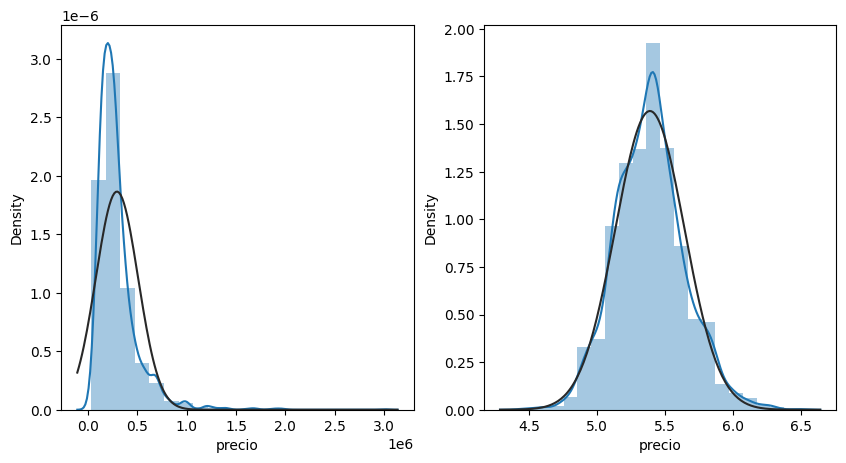

In [ ]:
#Analysis the target distribution
#in order to ease making prediction with our model the price should folow a normal distribution(standarize, log, normalize..)

fig, ax = plt.subplots(1, 2, figsize= (10,5))
sns.distplot(
    df[target],
    fit = stats.norm,
    ax = ax[0],
    bins=20
)
sns.distplot(
    np.log10(df[target]),
    fit = stats.norm,
    ax = ax[1],
    bins=20
)

In [ ]:
#numeric correlation.
corr  = df.corr()
corr.style.background_gradient(cmap= 'coolwarm')

<ipython-input-50-525b0aa79408>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr  = df.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,precio,elevator,toilets,year,storage_room,metros,wardrobe,terrace,balcony,garden,garage,heating,air_conditioning
precio,1.000000,0.275074,0.512161,-0.012419,0.074294,0.592589,0.198426,0.114036,-0.004916,nan,0.166803,0.074867,0.153099
elevator,0.275074,1.000000,0.228817,0.220188,0.131509,0.209491,0.271801,0.113629,-0.040294,nan,0.256223,0.068676,0.132593
toilets,0.512161,0.228817,1.000000,0.108527,0.111006,0.542425,0.234996,0.134735,0.031820,nan,0.228783,0.054619,0.086889
year,-0.012419,0.220188,0.108527,1.000000,0.230472,-0.012974,0.167073,0.056315,-0.079041,nan,0.382410,0.042337,0.116222
storage_room,0.074294,0.131509,0.111006,0.230472,1.000000,0.126522,0.155287,0.173753,-0.027857,nan,0.398087,0.048181,0.149687
metros,0.592589,0.209491,0.542425,-0.012974,0.126522,1.000000,0.136317,0.141122,0.045184,nan,0.176689,0.065364,0.034546
wardrobe,0.198426,0.271801,0.234996,0.167073,0.155287,0.136317,1.000000,0.122106,0.131022,nan,0.195404,0.209560,0.361341
terrace,0.114036,0.113629,0.134735,0.056315,0.173753,0.141122,0.122106,1.000000,-0.056924,nan,0.219533,0.074843,0.052531
balcony,-0.004916,-0.040294,0.031820,-0.079041,-0.027857,0.045184,0.131022,-0.056924,1.000000,nan,-0.055330,0.036520,0.030198
garden,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df.select_dtypes(include = np.number).columns

Index(['precio', 'elevator', 'toilets', 'year', 'storage_room', 'metros',
       'wardrobe', 'terrace', 'balcony', 'garden', 'garage', 'heating',
       'air_conditioning'],
      dtype='object')

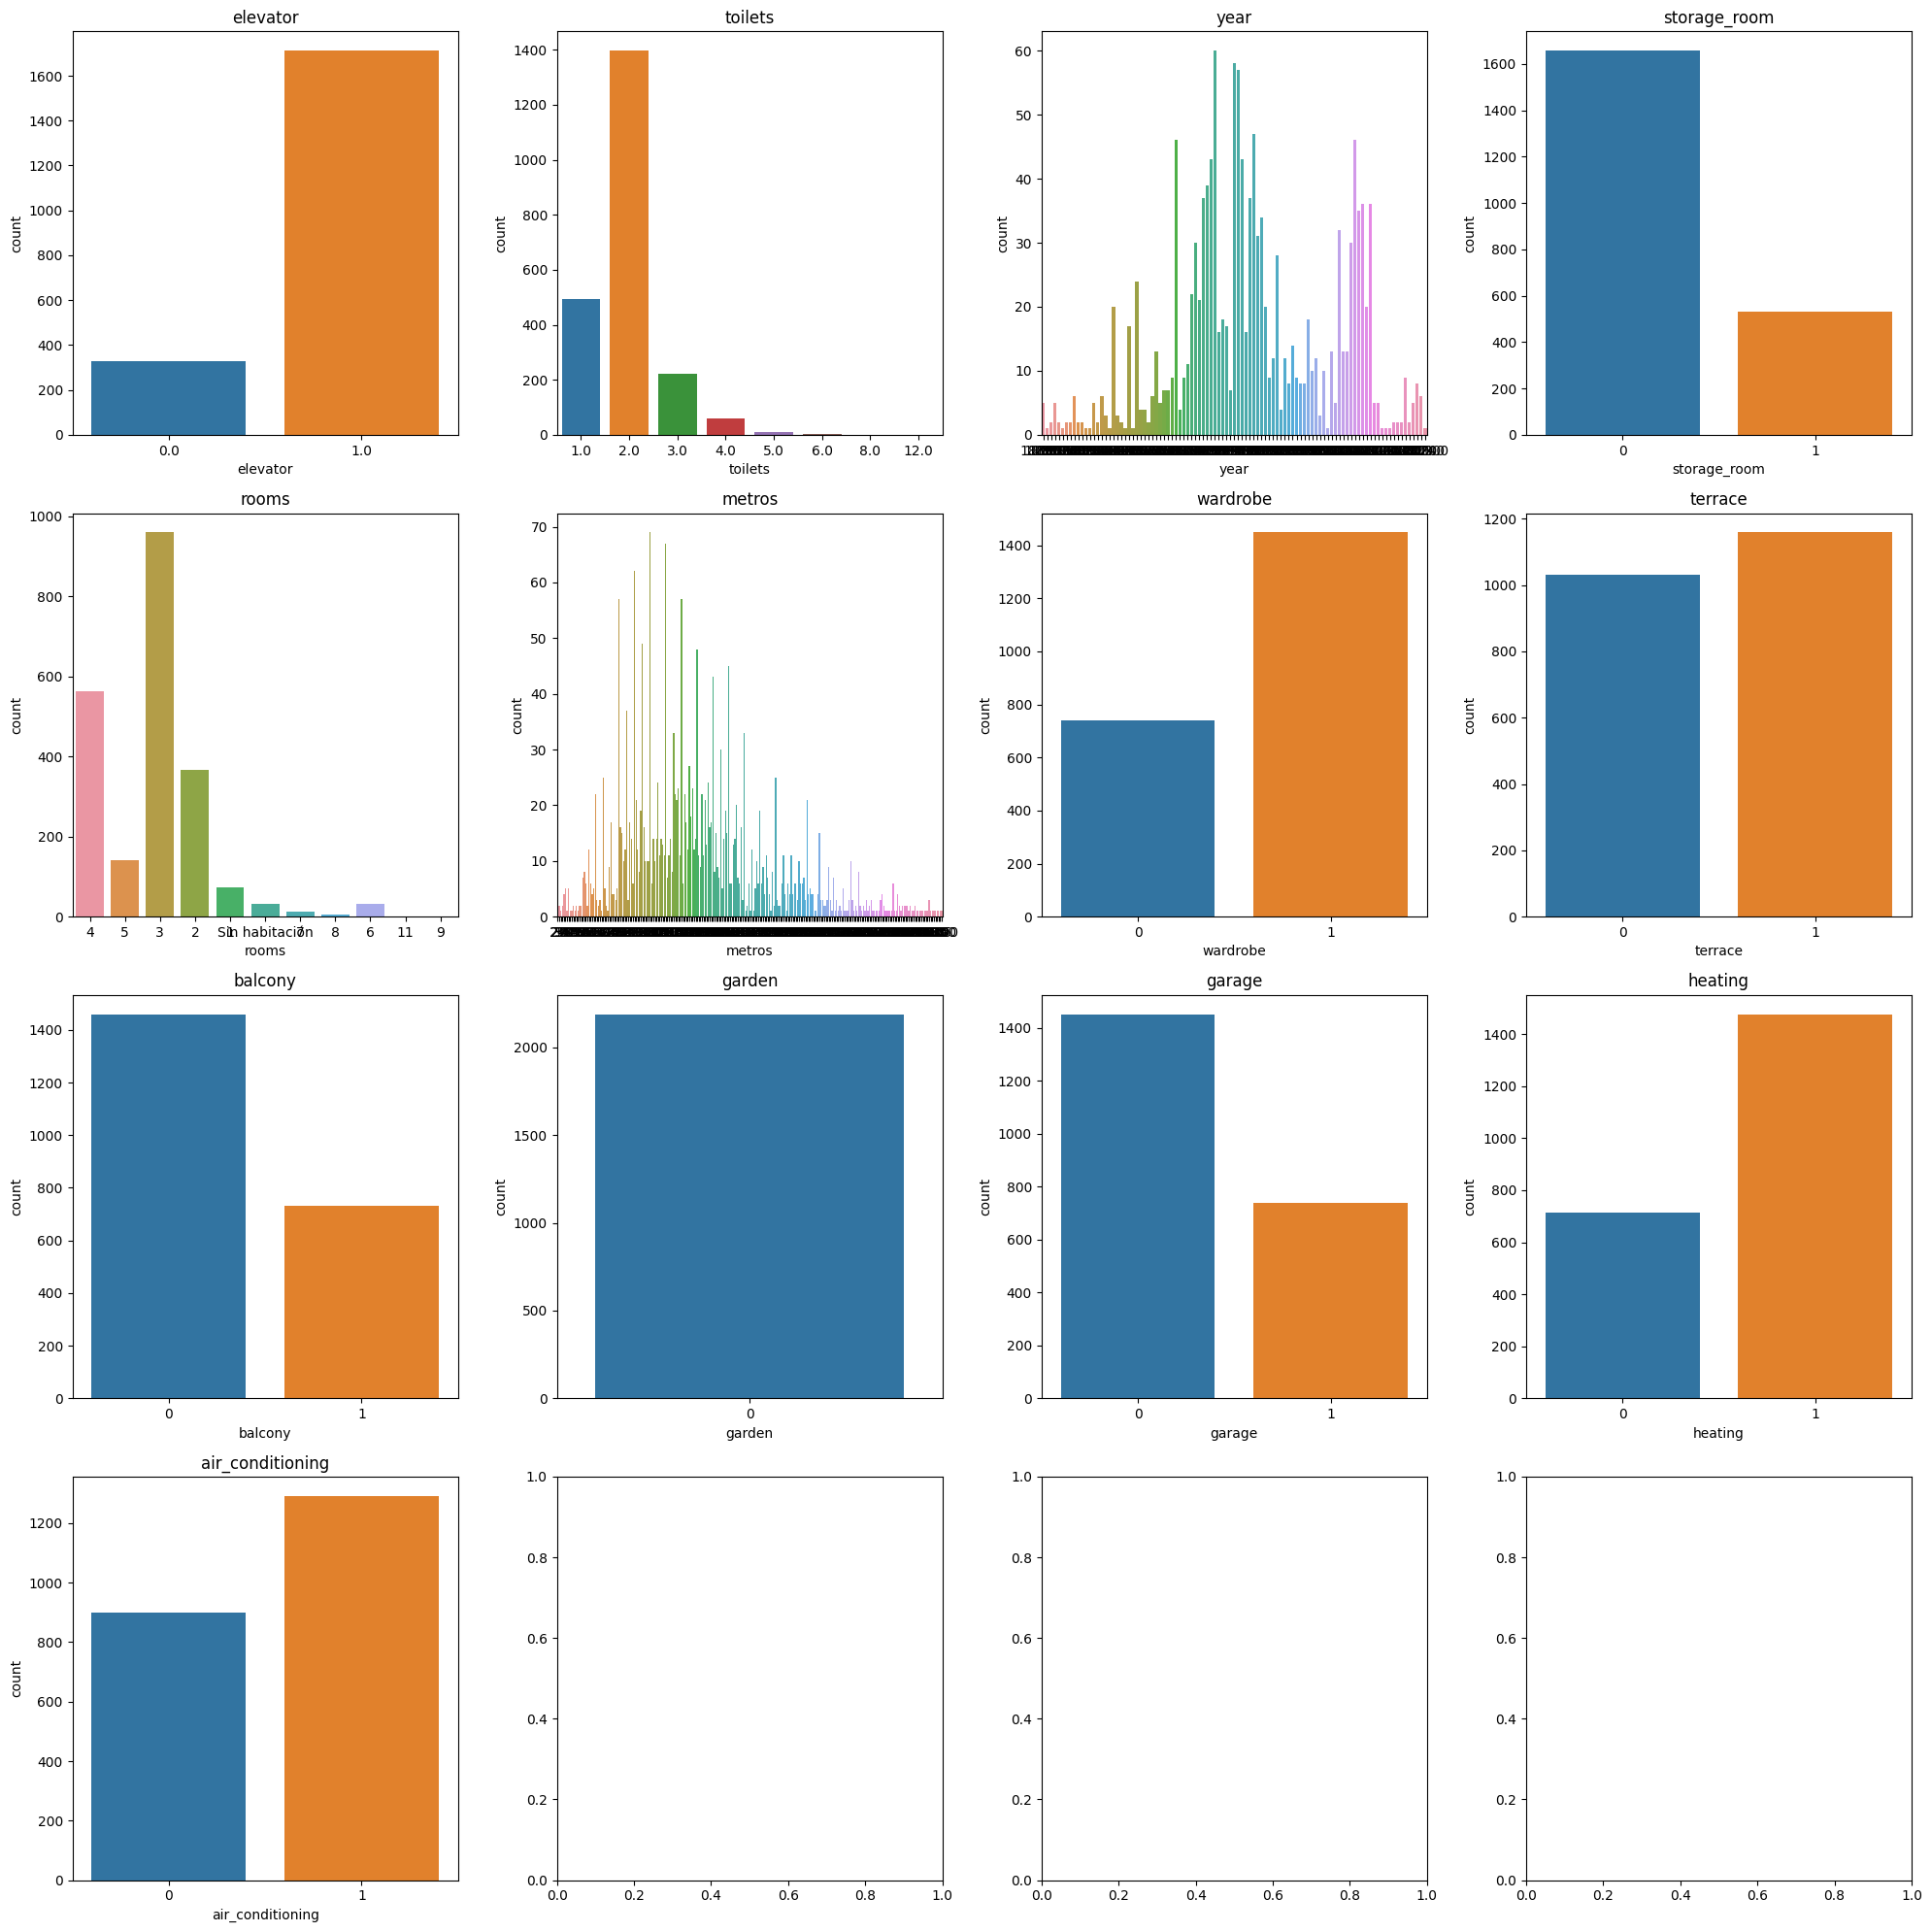

In [ ]:
#bolean visualization

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(['elevator', 'toilets', 'year', 'storage_room', 'rooms', 'metros', 'wardrobe', 'terrace', 'balcony', 'garden', 'garage', 'heating', 'air_conditioning']):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()
  

Since the data has been obtained from flats close to the shore it's normal not to have garden and therefore observation of flats with it, thus the variable garden won't have any affect for our model so we should deleted

In [ ]:
df.drop(columns = 'garden', axis = 1, inplace=True)

##Preprocessing

###Nan values





In [ ]:
df['elevator'].fillna(df['elevator'].value_counts().index[0], inplace=True)
df['flat'].fillna(df['flat'].value_counts().index[0], inplace=True)

In [ ]:
df_clean = df.copy()

years = df_clean['year'].values.reshape(-1,1)

#KNN imputer

imputer = KNNImputer(n_neighbors = 3)
year_imputed = imputer.fit_transform(years)

df_clean['year'] = year_imputed.flatten()


In [ ]:

def knn_nan(df, column):
    column_values = df[column].values.reshape(-1, 1)

    # KNN imputer
    imputer = KNNImputer(n_neighbors=3)
    column_imputed = imputer.fit_transform(column_values)

    df[column] = column_imputed.flatten()

    return df



In [ ]:
df_clean['toilets'].fillna(df_clean['toilets'].value_counts().index[0], inplace=True)

In [ ]:
df_clean['codition'].fillna(df_clean['codition'].value_counts().index[0], inplace=True)

In [ ]:
df_clean.isna().sum()

title                 0
location              0
precio                0
postal_code           0
elevator              0
toilets               0
year                  0
storage_room          0
orientation         921
flat                  0
rooms                 0
metros                0
codition              0
wardrobe              0
terrace               0
balcony               0
garage                0
heating               0
air_conditioning      0
dtype: int64

In [ ]:
df['rooms'].mode()[0]

3

In [ ]:
df_clean['rooms'] = np.where(df_clean['rooms'] == 'Sin habitación',df_clean['rooms'].mode()[0] , df_clean['rooms'])

In [ ]:
df_clean['orientation'].value_counts()

sur      572
este     326
norte    233
oeste    138
Name: orientation, dtype: int64

In [ ]:
df_clean['orientation'].mode()[0]

'sur'

In [ ]:
mode_orientation = df_clean['orientation'].mode()[0]

# Fill missing values with the mode
df_clean['orientation'] = df_clean['orientation'].fillna(mode_orientation)

By imputing the missing values with the mode, it's being ensured that the distribution of the "orientation" variable is preserved to some extent.

##Modelling 

In [ ]:
x, y= df_clean.drop(['precio', 'title'], axis = 1), df_clean[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

In [ ]:
df_clean.select_dtypes(exclude=np.number).columns


Index(['title', 'location', 'postal_code', 'orientation', 'flat', 'rooms',
       'codition'],
      dtype='object')

In [ ]:
categorical_var = ['location', 'orientation', 'flat', 'codition']
numeric_var = ['elevator', 'toilets', 'year', 'storage_room', 'rooms','metros', 'wardrobe', 'terrace', 'balcony', 'garden', 'garage','heating', 'air_conditioning']

In [ ]:
impute_ct = ColumnTransformer(
    transformers=[
        ('impute', OneHotEncoder(handle_unknown='ignore'), ['location', 'orientation', 'flat', 'codition'])
    ], remainder = 'passthrough'
)

In [ ]:
pipe = Pipeline(
    steps=[
        ('OneHot', impute_ct),
        ('model', TransformedTargetRegressor(
            regressor= Ridge(alpha= 1e-10), func= np.log10, inverse_func= sp.special.exp10
        ))
    ]
)

In [ ]:
pipe

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'orientation',
                                                   'flat', 'codition'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'orientation',
                                                   'flat', 'codition'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [ ]:


y_pred_1 = pipe.predict(X_train)

mae_train= median_absolute_error(y_train, y_pred_1)
score_train= f'MAE on training set: {mae_train} euros'
print(score_train)
y_pred = pipe.predict(X_test)
mae_test= median_absolute_error(y_test, y_pred)
score_test= f'MAE on test set: {mae_test} euros'
print(score_test)



MAE on training set: 36290.25021370264 euros
MAE on test set: 37064.299292488766 euros


Text(0.5, 0, 'y_true')

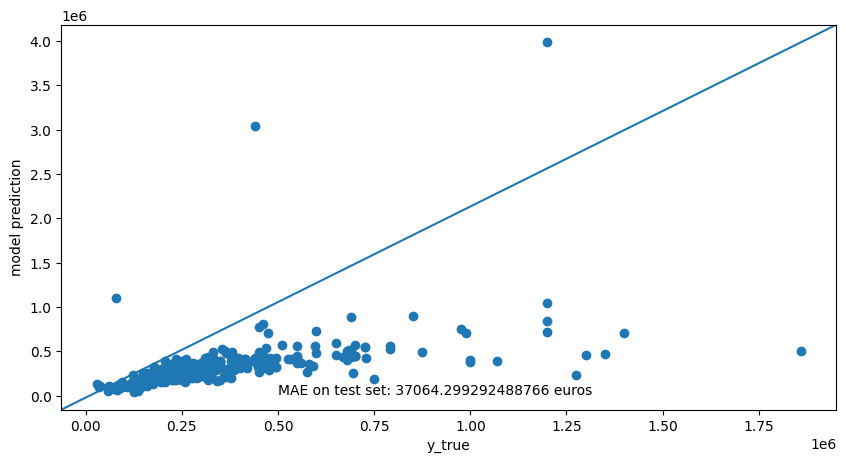

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
plt.scatter(y_test, y_pred)
ax.plot([0,1], [0,1], transform = ax.transAxes)
plt.text(500000, 9000, score_test)
plt.ylabel('model prediction')
plt.xlabel('y_true')


In [ ]:
pipe[:1]

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'orientation',
                                                   'flat', 'codition'])]))])

In [ ]:
pipe[:1].get_feature_names_out()[0:20]

array(['impute__location_Acapulco', 'impute__location_Aguamarina',
       'impute__location_Albal', 'impute__location_Alcalde Felipe Mallol',
       'impute__location_Alipark', 'impute__location_Almarda',
       'impute__location_Almazora/Almassora',
       'impute__location_Alquerias del Niño Perdido',
       'impute__location_Babel',
       'impute__location_Bahía Park - Isla Park',
       'impute__location_Barrio del Pilar', 'impute__location_Benalúa',
       'impute__location_Benalúa-La Florida-Babel-San Gabriel',
       'impute__location_Benicalap', 'impute__location_Burriana',
       'impute__location_Campoamor',
       'impute__location_Campoamor-Carolinas-Altozano',
       'impute__location_Canillo', 'impute__location_Casco Histórico',
       'impute__location_Casco Histórico-Santa Cruz'], dtype=object)

In [ ]:
features_names = pipe[:1].get_feature_names_out()[0:30]

coefs= pd.DataFrame( pipe[-1].regressor_.coef_[0:30], columns = ['coefficients'], index= features_names)

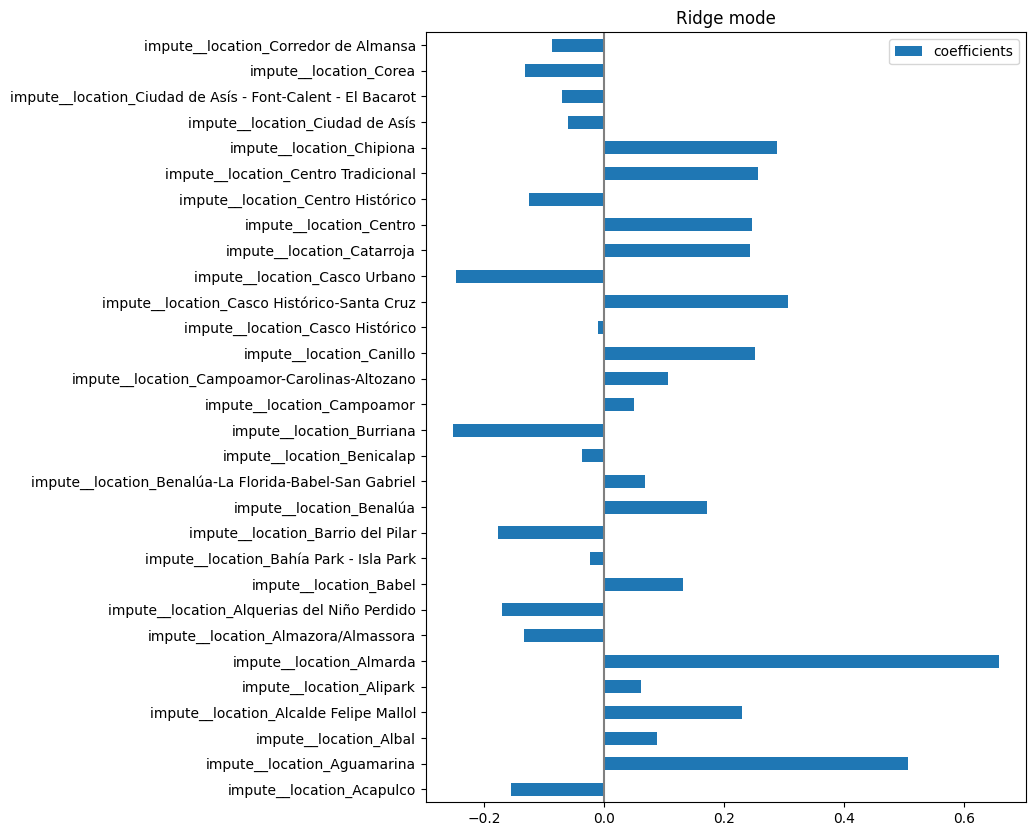

In [ ]:
coefs.plot.barh(figsize=(10,10))
plt.title('Ridge mode')
plt.axvline(x=0, color= '.5')
plt.subplots_adjust(left =0.3 )

As more to the rigth or to the left, more importance will have the variable, however the data it's not in the same scale.
Since the variance of each variable could misslead the importance of each variable, we can create our own coeficients by using the old ones multiplied by his variance.

In [ ]:


transformed_data = pipe[:1].transform(X_train)
column_names = pipe[:1].get_feature_names_out()

transformed_data_list = transformed_data.toarray().tolist()
column_names_list = column_names.tolist()

X_train_preprocessed = pd.DataFrame(data=transformed_data_list, columns=column_names_list)


<Axes: >

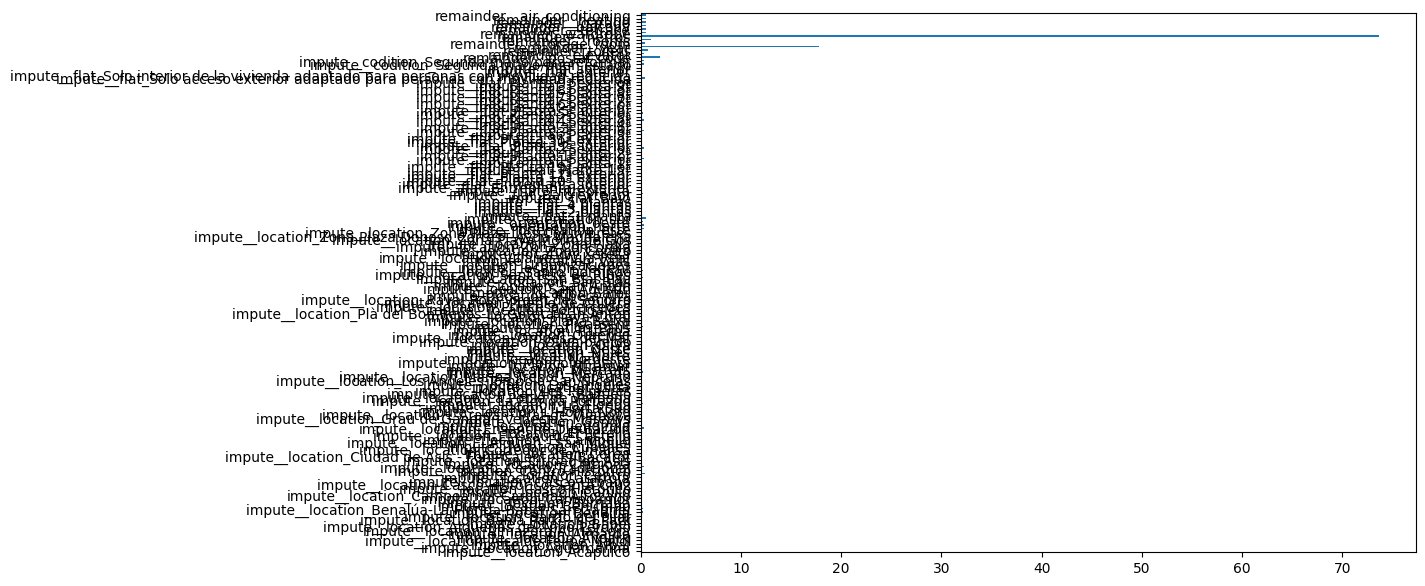

In [ ]:
#X_train_preprocessed = pd.DataFrame(pipe[:1].transform(X_train), columns =features_names)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(10,7))


The regularization term in ridge regression is proportional to the squared magnitude of the coefficients. Variables with higher variance tend to have larger coefficients, and their impact on the regularization term is more pronounced. By considering the variance, you can adjust the regularization strength accordingly to control the impact of each variable.

This effect cope the variable importance of the model since the weigth of the variable metros is not well represented in the model, to resolve this problem we're going to create new coefficients.

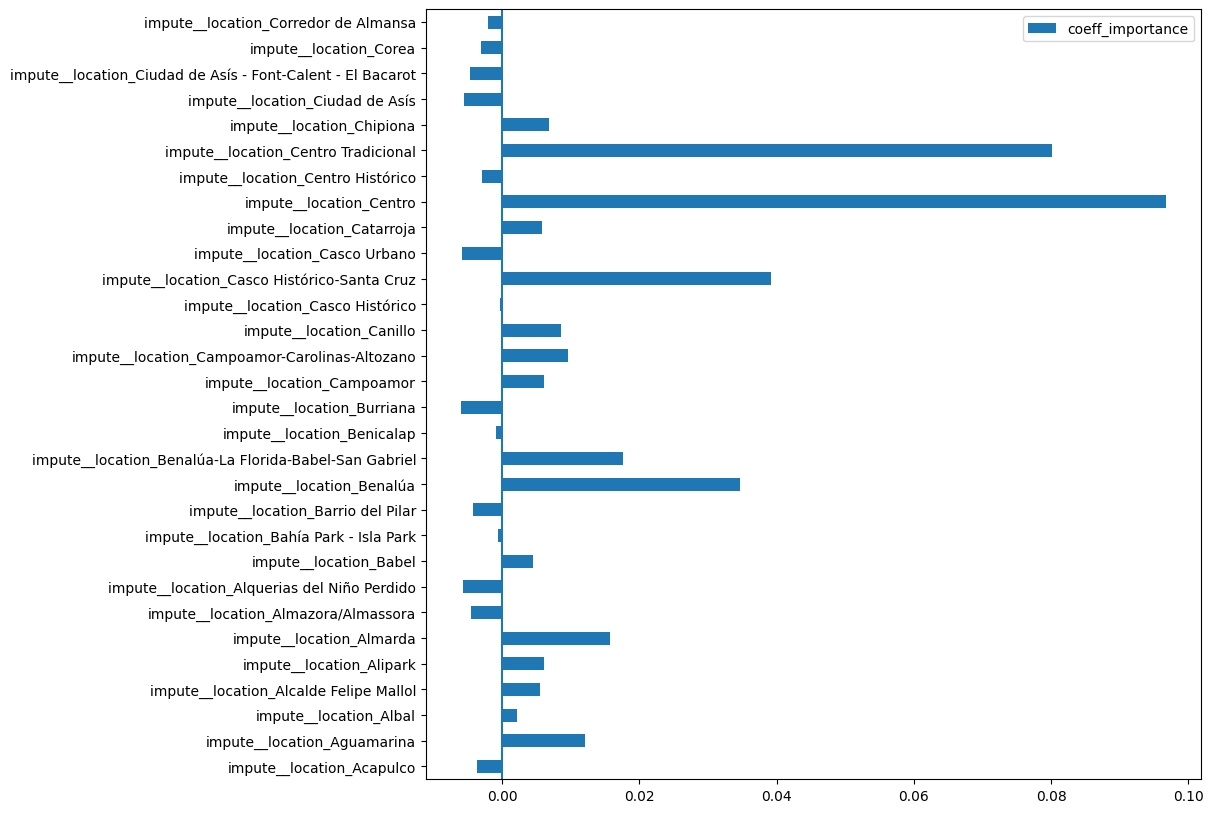

In [ ]:
coeffs = pd.DataFrame(pipe[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0) , columns= ['coeff_importance'],  index =features_names)
coeffs.plot(kind='barh', figsize=(10,10))
plt.axvline(x = 0)

Now we can truly appreciate each variable importance.

In [ ]:
#Validating with KFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2)
cv_model = cross_validate(pipe, x, y, return_estimator=True, n_jobs=2)


In [ ]:
cv_model['test_score']

array([ 2.59548939e-01,  3.26659917e-01,  2.16173430e-01, -1.17706894e+00,
       -4.51849104e+04])

Onces we checked the scores obtained in the Kfold validation we're going to our final step to improve the model with fine tunning.

###Fine tunning

In [ ]:
from sklearn.linear_model import RidgeCV

alphas= np.logspace(-10, 10, 21)
pipe = Pipeline(
    steps=[
        ('OneHot', impute_ct),
        ('model', TransformedTargetRegressor(
            regressor= RidgeCV(alphas =alphas), func= np.log10, inverse_func= sp.special.exp10
        ))
    ]
)
pipe.fit(X_train, y_train)


Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'orientation',
                                                   'flat', 'codition'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

In [ ]:
print(f'best alpha: {pipe[-1].regressor_.alpha_}')

best alpha: 1.0


Text(0.5, 0, 'y_true')

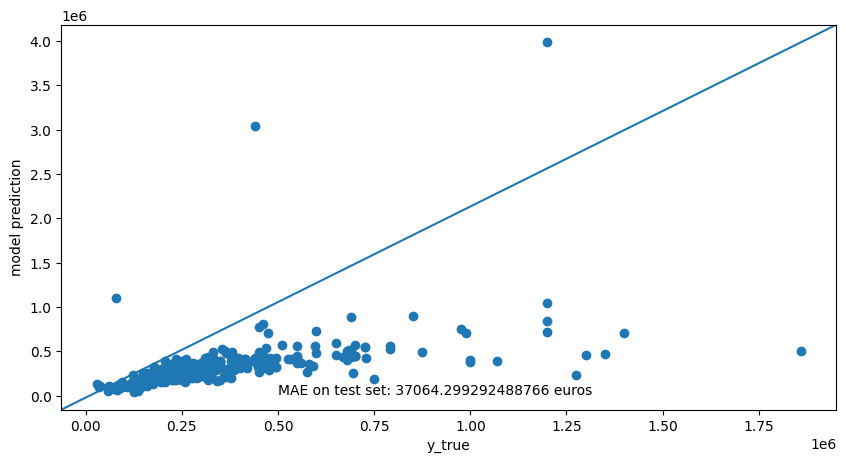

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
plt.scatter(y_test, y_pred)
ax.plot([0,1], [0,1], transform = ax.transAxes)
plt.text(500000, 9000, score_test)
plt.ylabel('model prediction')
plt.xlabel('y_true')


Through tunning alpha parameter we don't achieve any imporvement on the model performace since mean squared error barely moves.

In [ ]:
#Trainning the model with the new alpha
pipe = Pipeline(
    steps=[
        ('OneHot', impute_ct),
        ('model', TransformedTargetRegressor(
            regressor= Ridge(alpha= 1), func= np.log10, inverse_func= sp.special.exp10
        ))
    ]
)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location', 'orientation',
                                                   'flat', 'codition'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1)))])

In [ ]:
y_pred_1 = pipe.predict(X_train)

mae_train= median_absolute_error(y_train, y_pred_1)
score_train= f'MAE on training set: {mae_train} euros'
print(score_train)
y_pred = pipe.predict(X_test)
mae_test= median_absolute_error(y_test, y_pred)
score_test= f'MAE on test set: {mae_test} euros'
print(score_test)



MAE on training set: 37756.07684029585 euros
MAE on test set: 37686.692508201115 euros


##Importing model

In [ ]:
ridge_model = pipe.named_steps['model'].regressor_

In [ ]:
ridge_model

Ridge(alpha=1)

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)